In [26]:
from Hilbert2D import Hilbert2D
from Hilbert3D import Hilbert3D

# 2D Hilbertova křivka 

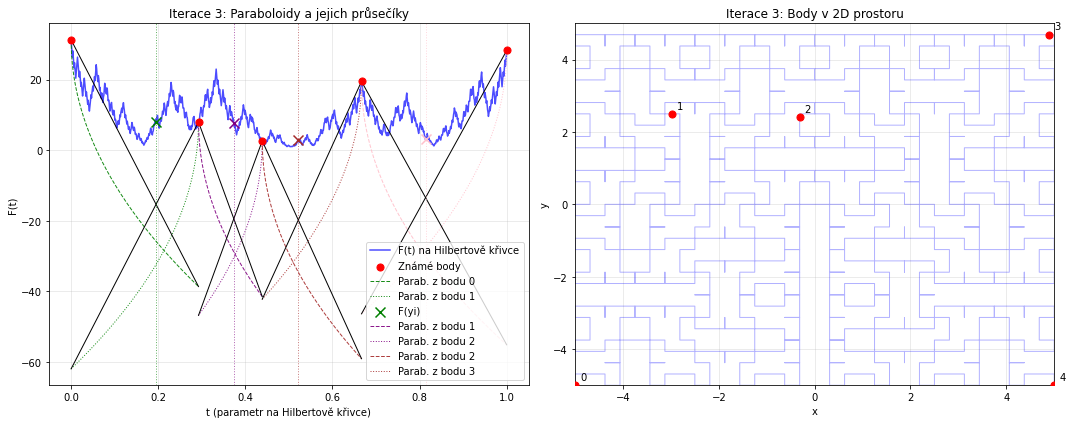

In [27]:
hilbert = Hilbert2D(15)
# Vykreslí paraboloidy v první iteraci (iteration_to_plot=0)
hilbert.plot_holder_paraboloids(H=100, r=3, eps=1e-4, max_iter=10, 
                                n=5, x_min=-5, x_max=5, y_min=-5, y_max=5, 
                                whatFunc=0, iteration_to_plot=3)

## Test mezivýpočtů pro výpočet bodu křivky 

In [3]:

h2d = Hilbert2D(15)

Q = h2d.dec_to_quarter(0.2)
print("Quarter Q:", Q)

e0, dj = h2d.ej_and_dj_counter(Q)
result = h2d.calculate_point(e0, dj, Q)
print("Calculated point:", result)


Quarter Q: [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0]
Calculated point: [[0.20001221]
 [0.40002441]]


In [4]:

h = [2, 0, 3]
e0, dj = h2d.ej_and_dj_counter(h)
print("e0:", e0)
print("dj:", dj)

result = h2d.calculate_point(e0, dj, h)
print("Point from [2,0,3]:", result)

e0: [0. 0. 1.]
dj: [0. 0. 1.]
Point from [2,0,3]: [[0.625]
 [0.75 ]]


##  Hledání minima za využití algoritmu z knihovny scipy.optimize

In [5]:
print("Opravdové minimum f = 1.0")
for n in [2,3,4,5,6,7,8,25]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,0,1,0,1,0)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 1.0
precision=  2  =>  t = 0.387500,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  3  =>  t = 0.375001,  h(t) = (0.2500, 0.7500),  f = 1.002501
precision=  4  =>  t = 0.378125,  h(t) = (0.3000, 0.7500),  f = 1.001250
precision=  5  =>  t = 0.377539,  h(t) = (0.3000, 0.7812),  f = 1.003301
precision=  6  =>  t = 0.376954,  h(t) = (0.2812, 0.7813),  f = 1.003480
precision=  7  =>  t = 0.378661,  h(t) = (0.2968, 0.7500),  f = 1.001255
precision=  8  =>  t = 0.382246,  h(t) = (0.3286, 0.7852),  f = 1.004034
precision= 25  =>  t = 0.378922,  h(t) = (0.3125, 0.7539),  f = 1.001531


In [6]:

print("Opravdové minimum f = -1.0")
for n in [2,3,4,5,6,7,8,10,11,12,13]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-5,5,-5,5,1)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = -1.0
precision=  2  =>  t = 0.633790,  h(t) = (2.8516, 2.5000),  f = 4.552424
precision=  3  =>  t = 0.382803,  h(t) = (-2.5000, 3.1242),  f = 2.711152
precision=  4  =>  t = 0.367132,  h(t) = (-3.1250, 3.1339),  f = 3.700411
precision=  5  =>  t = 0.361333,  h(t) = (-2.8141, 3.4375),  f = 4.136436
precision=  6  =>  t = 0.361573,  h(t) = (-2.8131, 3.2812),  f = 0.947096
precision=  7  =>  t = 0.361636,  h(t) = (-2.8164, 3.2031),  f = 0.215062
precision=  8  =>  t = 0.361650,  h(t) = (-2.8154, 3.1641),  f = 0.046597
precision= 10  =>  t = 0.361653,  h(t) = (-2.8125, 3.1421),  f = 0.006380
precision= 11  =>  t = 0.361653,  h(t) = (-2.8125, 3.1398),  f = 0.004590
precision= 12  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368
precision= 13  =>  t = 0.361652,  h(t) = (-2.8223, 3.1445),  f = 0.016368


In [7]:
print("Opravdové minimum f = 0.0")
for n in [2,3,4,5,6,7,8]:
    h2d = Hilbert2D(10)
    t_min, h_min, f_min = h2d.find_minimum_mapped(n,-10,10,-10,10,2)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}),  f = {f_min:.6f}")

Opravdové minimum f = 0.0
precision=  2  =>  t = 0.620192,  h(t) = (4.6154, 5.0000),  f = 0.961538
precision=  3  =>  t = 0.625000,  h(t) = (5.0000, 5.0001),  f = 1.000011
precision=  4  =>  t = 0.531251,  h(t) = (2.5003, 2.5000),  f = 0.250027
precision=  5  =>  t = 0.530950,  h(t) = (2.5000, 2.3077),  f = 0.240385
precision=  6  =>  t = 0.531249,  h(t) = (2.5011, 2.5000),  f = 0.250109
precision=  7  =>  t = 0.531190,  h(t) = (2.5000, 2.3455),  f = 0.240756
precision=  8  =>  t = 0.557208,  h(t) = (0.2968, 2.5781),  f = 1.383801


## Hledání minima za pomoci Hoelderova algoritmu

## Pro vlastní funkci


    Iterace n  Rozdíl Hoelder  Rozdíl scipy  Rozdíl DE
0           1        0.020000      0.020000        0.0
1           2        0.001251      0.001250        0.0
2           3        0.002597      0.002501        0.0
3           4        0.000109      0.001250        0.0
4           5        0.000078      0.003301        0.0
5           6        0.000453      0.003480        0.0
6           7        0.000165      0.001255        0.0
7           8        0.000122      0.004034        0.0
8           9        0.000162      0.003553        0.0
9          10        0.000087      0.001426        0.0
10         11        0.000078      0.003451        0.0
11         12        0.000013      0.003408        0.0
12         13        0.000032      0.003491        0.0
13         14        0.000035      0.003633        0.0
14         15        0.000049      0.001320        0.0
15         16        0.000092      0.001782        0.0
16         17        0.000066      0.003514        0.0
17        

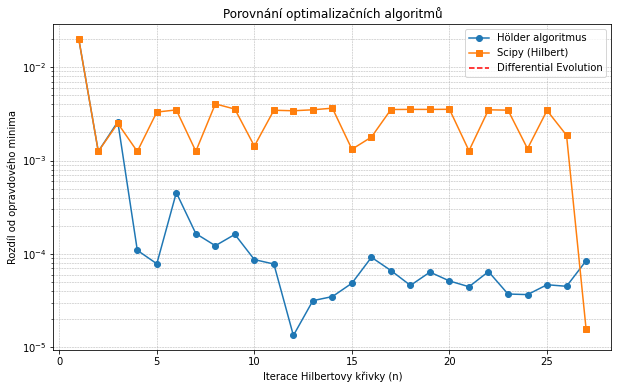

In [8]:
h2d = Hilbert2D(50)

H =1
r = 3
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0, 1.0)

Porovnání Holderovských konstant

In [9]:
analysis_df = h2d.analyze_holder_constants(H, r, eps, max_iter, N_vals, 0, 1, 0, 1, 0)
print(analysis_df)
    

     n  H opravdové  H průměr  H finální
0    1            1  0.426534   0.412467
1    2            1  0.688646   0.687714
2    3            1  0.733326   0.709927
3    4            1  0.825686   0.837530
4    5            1  0.907709   1.039513
5    6            1  0.908493   1.047657
6    7            1  0.865854   0.892190
7    8            1  0.947344   0.988261
8    9            1  0.920278   0.945648
9   10            1  0.930311   0.967865
10  11            1  0.915191   0.937921
11  12            1  0.926393   0.962740
12  13            1  0.857277   0.943584
13  14            1  0.876041   0.888153
14  15            1  0.961339   0.993473
15  16            1  0.861081   0.900563
16  17            1  0.869146   0.914540
17  18            1  0.888491   0.908401
18  19            1  0.841537   0.897805
19  20            1  0.946738   1.127744
20  21            1  0.869864   0.882959
21  22            1  0.852628   0.923266
22  23            1  0.851510   0.961853
23  24          

In [10]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,25] 
max_iter = 100
print("Opravdové minimum f = 1.0")
for n in N:
    t_min, f_min, x_min, y_min,_ = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,0,1,0,1,0)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 1.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.30076476213796566, 0.5)
  Hodnota f: 1.0200002924305638
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.29866031731776377, 0.75)
  Hodnota f: 1.0012508973748446
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.25, 0.7515336645917725)
  Hodnota f: 1.0025778592931287
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.29866031731776377, 0.75)
  Hodnota f: 1.0012508973748446
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.25, 0.7515336645917725)
  Hodnota f: 1.0025778592931287
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.7039323193752471)
  Hodnota f: 1.0000858565678346
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.3089599213942549, 0.6875

## Pro Himmelblauovu funkci 

    Iterace n  Rozdíl Hoelder  Rozdíl scipy     Rozdíl DE
0           1       13.273091     13.272704  9.499071e-16
1           2        4.553032      4.552424  9.499071e-16
2           3        2.742638      2.711152  9.499071e-16
3           4        0.046061      3.700411  9.499071e-16
4           5        0.778544      4.136436  9.499071e-16
5           6        0.053351      0.947096  9.499071e-16
6           7        0.190127      0.215062  9.499071e-16
7           8        0.251138      0.046597  9.499071e-16
8           9        0.023388      0.023605  9.499071e-16
9          10        0.019746      0.006380  9.499071e-16
10         11        0.042367      0.008561  9.499071e-16
11         12        0.078064      0.012267  9.499071e-16
12         13        0.121692      0.006108  9.499071e-16
13         14        0.061890      0.009151  9.499071e-16
14         15        0.334623      0.005140  9.499071e-16
15         16        0.304349      0.136017  9.499071e-16
16         17 

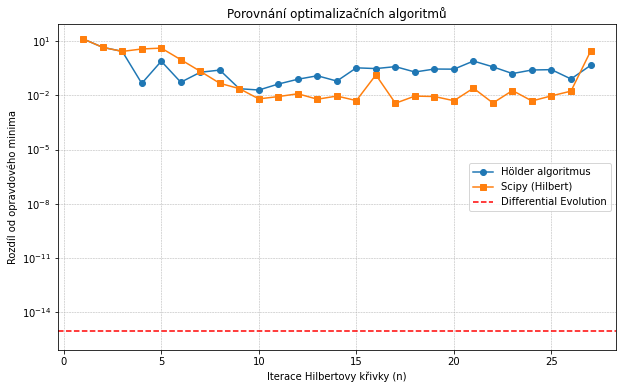

In [11]:
H = 655.35
r = 2
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,1,0.0)

In [12]:
analysis_df = h2d.analyze_holder_constants(H, r, eps, max_iter,N_vals,-5,5,-5,5,1)
print(analysis_df)

     n  H opravdové     H průměr    H finální
0    1       655.35  1372.018169  1396.042586
1    2       655.35  1410.463334  1479.598280
2    3       655.35  2639.331993  2904.441647
3    4       655.35  2750.493737  3076.948174
4    5       655.35  3064.226116  3472.450953
5    6       655.35  3131.604107  3311.419324
6    7       655.35  2957.939102  3033.555822
7    8       655.35  2958.376921  3146.692561
8    9       655.35  3052.408770  3358.846049
9   10       655.35  2961.428746  3208.768523
10  11       655.35  2999.394341  3089.327036
11  12       655.35  3066.750202  3598.447591
12  13       655.35  2972.358977  3263.699186
13  14       655.35  3017.232671  3218.064600
14  15       655.35  3015.777550  3153.575145
15  16       655.35  2981.689965  3122.336812
16  17       655.35  2991.155153  3018.638695
17  18       655.35  3123.857133  3504.834736
18  19       655.35  3114.784966  3453.155661
19  20       655.35  3007.082332  3152.002692
20  21       655.35  3007.881776  

## Pro Matyasovu funkci

    Iterace n  Rozdíl Hoelder  Rozdíl scipy     Rozdíl DE
0           1        0.961539      0.000000  7.193781e-11
1           2        0.240386      0.240385  7.193781e-11
2           3        0.060101      0.250003  7.193781e-11
3           4        0.015029      0.062507  7.193781e-11
4           5        0.000440      0.060096  7.193781e-11
5           6        0.001200      0.062527  7.193781e-11
6           7        0.000413      0.060189  7.193781e-11
7           8        0.000232      0.345950  7.193781e-11
8           9        0.000062      0.061891  7.193781e-11
9          10        0.000234      0.061022  7.193781e-11
10         11        0.000033      0.070131  7.193781e-11
11         12        0.001245      0.060193  7.193781e-11
12         13        0.001099      0.064508  7.193781e-11
13         14        0.002416      0.060652  7.193781e-11
14         15        0.001972      0.248869  7.193781e-11
15         16        0.001028      0.253885  7.193781e-11
16         17 

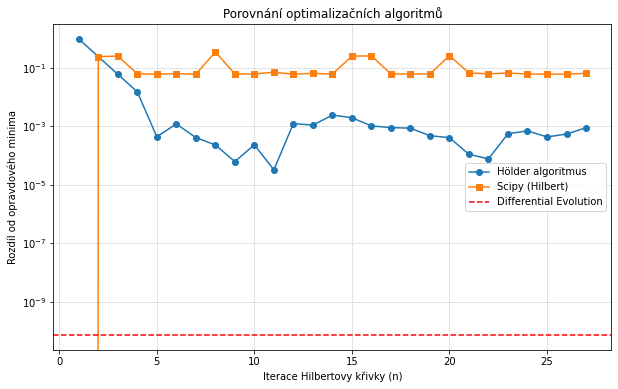

In [13]:
H = 7.07
r = 1.1
eps = 1e-5
N_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
max_iter = 250

df = h2d.compare_algorithms(H, r, eps, max_iter,N_vals,-5,5,-5,5,2,0.0)

In [14]:
comparison_df = h2d.analyze_holder_constants(H, r, eps, max_iter,N_vals,-5,5,-5,5,2)
print(comparison_df)

     n  H opravdové   H průměr  H finální
0    1         7.07  21.847095  21.621648
1    2         7.07  22.155637  22.021963
2    3         7.07  23.845785  23.732208
3    4         7.07  23.654559  23.497519
4    5         7.07  32.186454  42.414477
5    6         7.07  23.967668  23.897936
6    7         7.07  23.750120  23.662894
7    8         7.07  23.689745  23.596445
8    9         7.07  23.664952  23.569133
9   10         7.07  23.657061  23.568662
10  11         7.07  23.656352  23.567834
11  12         7.07  23.654585  23.565949
12  13         7.07  23.651314  23.562468
13  14         7.07  32.984604  49.443008
14  15         7.07  23.650239  23.561287
15  16         7.07  23.650673  23.561735
16  17         7.07  36.879151  44.414569
17  18         7.07  23.650793  23.561867
18  19         7.07  23.650844  23.561922
19  20         7.07  23.650853  23.561932
20  21         7.07  23.650869  23.561949
21  22         7.07  23.650874  23.561954
22  23         7.07  23.650871  23

In [15]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min,_ = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-5,5,-5,5,1)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (3.4008292305944003, 0.0)
  Hodnota f: 13.273978221149033
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (2.8927169045048284, 2.5)
  Hodnota f: 4.608709640881379
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, 3.091412372729515)
  Hodnota f: 2.7541426183213624
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (-3.75, -3.2785089872662354)
  Hodnota f: 0.046661783725520156
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (3.700089755958267, -1.875)
  Hodnota f: 0.7118409466027372
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (2.8125, 1.8310931958121301)
  Hodnota f: 2.28100629228529
----------------------------------------
Iterace hilbertovy křivky: 7
  Souřadnice (x,y): (2.9898656765158194, 2.265625)

In [16]:
H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,10,20,21,22,23,24,25,26,27] 
max_iter = 100
print("Opravdové minimum f = 0.0")
for n in N:
    t_min, f_min, x_min, y_min,_ = h2d.Holder_algorithm_mapped(H, r, eps, max_iter,n,-10,10,-10,10,2)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Opravdové minimum f = 0.0
Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (-10.0, -9.235904673967793)
  Hodnota f: 3.8461607030758245
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (-5.0, -4.621996960729415)
  Hodnota f: 0.9615498295473106
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (-2.5, -2.2765438283894213)
  Hodnota f: 0.240636874602965
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (-1.25, -1.1883600986207554)
  Hodnota f: 0.06040586906596901
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (-0.625, -0.6114468179291954)
  Hodnota f: 0.01533392952173343
----------------------------------------
Iterace hilbertovy křivky: 6
  Souřadnice (x,y): (-0.3125, -0.2001663577454238)
  Hodnota f: 0.00578297973918436
----------------------------------------
----------------------------------------
Iterace hilbertovy křivky:

## Vykreslení grafů Hilbertovy křivky

Bod na aproximačním polygonu: [0.2   0.375]


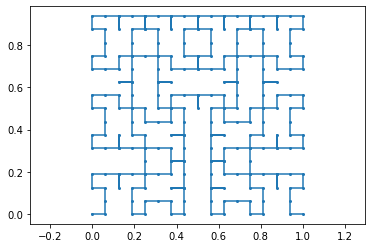

[1. 0.]


In [17]:
n = 4 
t = 0.2  

bod_na_polygonu = h2d.hilbert_polygon_point(t,n)
print("Bod na aproximačním polygonu:", bod_na_polygonu)

h2d.plot_hilbert_polygon(n)  
print(h2d.hilbert_polygon_point(1.0,n))

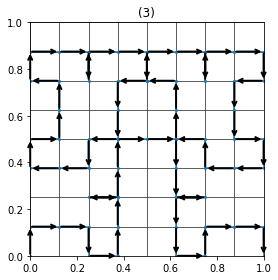

In [18]:
h2d.plot_multiple_hilberts_arrows([3])

## Vykreslení grafů pro Hilbertovu křivku s posunutím

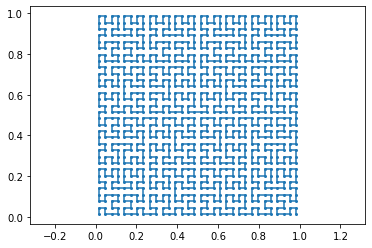

In [19]:
h2da = Hilbert2D(15)
h2da.plot_mainstream_hilbert_polygon(5)  


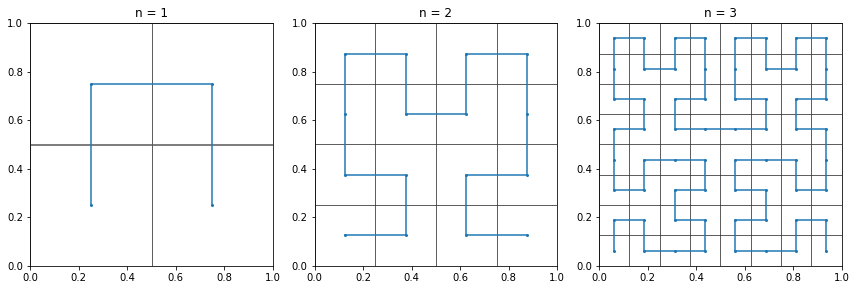

In [20]:
h2da.plot_multiple_hilberts([1, 2, 3])

# 3D Hilbertova křivka

## Test mezivýpočtů bodu křivky

In [21]:
h3d = Hilbert3D(20)


h2d_converter = Hilbert3D(20)
L = h2d_converter.dec_to_octal(0.2)
print("Octal L:", L)

h = [2, 0, 6]
result = h3d.ThreeD_Hilbert(h)
print("3D result:", result)




Octal L: [1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 4, 6, 3, 1, 5, 0, 0]
3D result: [0.625 0.75  0.125]


## Hledání minima za pomoci algoritmu z knihovny scipy.optimize

In [22]:
for n in [2,3,4,5,6,7,8]:
    h3d = Hilbert3D(10)
    t_min, h_min, f_min = h3d.find_minimum(n)
    print(f"precision={n:3d}  =>  t = {t_min:.6f},  h(t) = ({h_min[0]:.4f}, {h_min[1]:.4f}, {h_min[2]:.4f}),  f = {f_min:.6f}")

precision=  2  =>  t = 0.237500,  h(t) = (0.5000, 0.7000, 0.0000),  f = 1.020000
precision=  3  =>  t = 0.236326,  h(t) = (0.3752, 0.7500, 0.0000),  f = 1.004074
precision=  4  =>  t = 0.236768,  h(t) = (0.3125, 0.7000, 0.0000),  f = 1.000078
precision=  5  =>  t = 0.236084,  h(t) = (0.3750, 0.6874, 0.0000),  f = 1.002891
precision=  6  =>  t = 0.236789,  h(t) = (0.2812, 0.7011, 0.0000),  f = 1.000176
precision=  7  =>  t = 0.237254,  h(t) = (0.3281, 0.6472, 0.0078),  f = 1.009602
precision=  8  =>  t = 0.237254,  h(t) = (0.3292, 0.6484, 0.0039),  f = 1.005662


## Hledání minima pomocí Hoelderovského algoritmu

In [23]:
h3d = Hilbert3D(50)


H = 2 * 1.4142 * 5**(1/2)   # Lipschitz/Hölder odhad
r = 1.1
eps = 1e-5
N = [1,2,3,4,5,6,7,8,9,13,15,16,17,18,20,21] 
max_iter = 250

for n in N:
    t_min, f_min, x_min, y_min, z_min = h3d.Holder_algorithm(H, r, eps, max_iter,n)
    print(f"Iterace hilbertovy křivky: {n}")
    print(f"  Souřadnice (x,y): ({x_min}, {y_min}, {z_min})")
    print(f"  Hodnota f: {f_min}")
    print("-" * 40)

Iterace hilbertovy křivky: 1
  Souřadnice (x,y): (0.2996653785872082, 0.5, 0.0)
  Hodnota f: 1.020000055985745
----------------------------------------
Iterace hilbertovy křivky: 2
  Souřadnice (x,y): (0.0, 0.7002308730526581, 0.0)
  Hodnota f: 1.0450000266511832
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 3
  Souřadnice (x,y): (0.375146432837278, 0.75, 0.0)
  Hodnota f: 1.0040734931840838
----------------------------------------
Iterace hilbertovy křivky: 4
  Souřadnice (x,y): (0.3125, 0.6995332689602733, 0.0)
  Hodnota f: 1.0000782339189318
----------------------------------------
Iterace hilbertovy křivky: 5
  Souřadnice (x,y): (0.29881784943171397, 0.6875

## Vykreslení grafu pro 3D křivku

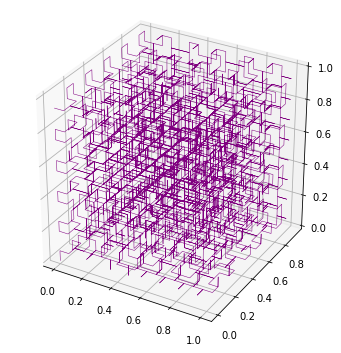

In [24]:
hilbert = Hilbert3D(10)
hilbert.plot_hilbert_polygon(4)


## Graf posunuté 3D H. křivky

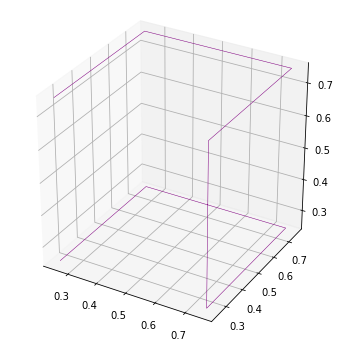

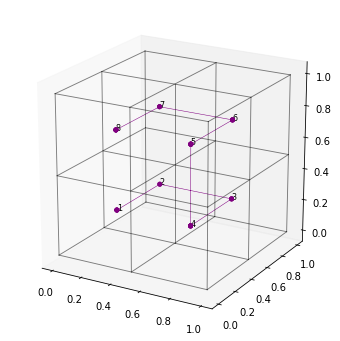

In [25]:
hilbert.plot_mainstream_hilbert(1)
hilbert.plot_mainstream_hilbert_cubes(1)